# Upsilon results

In [431]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

params = {'legend.fontsize': 16,
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
            'font.size': 18}
plt.rcParams.update(params)

## Plotting fiducial matter-power spectrum
and compare it with Sukhdeep's fiducial

In [440]:
#read files

#%cat 'data/test_Pk_camb.dat'
Pk_camb   = pd.read_csv('data/test_Pk_camb.dat',   names=['k', 'Pk_camb'], index_col=['k'], sep='\s+')
Pk_coyote = pd.read_csv('data/test_Pk_coyote.dat', names=['k', 'Pklin', 'Pk_coyote'], index_col=['k'], sep='\s+')
Pk_Suk    = pd.read_csv('data/test_Pk_Suk27.dat',  names=['k', 'Pk_Sukhdeep'], index_col=['k'], sep='\s+')
Pk_camb.head(2)

,Pk_camb
k,
0.000100,348.83
0.000102,355.59


In [541]:
def logs_legend(plt, ax):
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.legend(loc= 'best')
    
def logs(ax):
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([1,71])

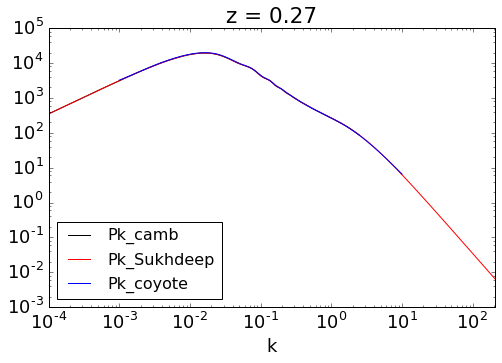

In [432]:
#plot files

fig = plt.figure(figsize=(8, 5))
ax  = fig.add_subplot(1, 1, 1)
Pk_camb.plot(ax= ax, style='k')
Pk_Suk['Pk_Sukhdeep'].plot(ax =ax, style ='r-')
Pk_coyote['Pk_coyote'].plot(ax =ax, style ='b-')
logs_legend(plt, ax)
ax.set_title('z = 0.27')

## Correlation functions
and compare them with Tobias fiducial xi's

fiducial values at z=0, from Tobias
omegabh2 = 0.022140, omegach2 =  0.1072, theta = 1.025666, logA = 3.14, ns = 0.96

In [336]:
#%cat  'data/test_Xi_Afid.dat'

In [403]:
Xi_Afid = pd.read_csv('data/test_Xi_Afid.dat', names=['r', 'Xa', 'Xb'], index_col=['r'], sep='\s+')
Xi_Tobi = pd.read_csv('data/test_Tobias_XA_fid.dat', names=['r', 'Xa', 'Xb'], index_col=['r'], sep='\s+')
Xi_Tobi['abs_Xa'] = abs(Xi_Tobi.Xa)
Xi_Afid['abs_Xa'] = abs(Xi_Afid.Xa)

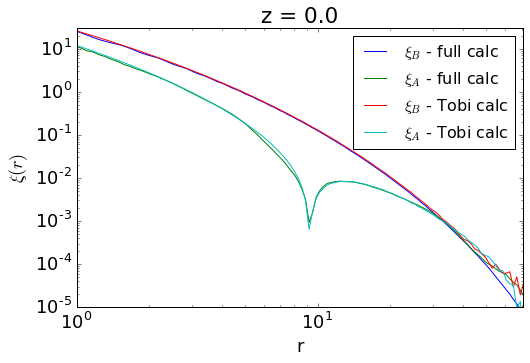

In [441]:
fig = plt.figure(figsize=(8, 5))
ax  = fig.add_subplot(1, 1, 1)
Xi_Afid['Xb'].plot(    label='$\\xi_B$ - full calc')
Xi_Afid['abs_Xa'].plot(label='$\\xi_A$ - full calc')
Xi_Tobi['Xb'].plot(    label='$\\xi_B$ - Tobi calc')
Xi_Tobi['abs_Xa'].plot(label='$\\xi_A$ - Tobi calc')
ax.set_xlim([1,71])
ax.set_ylabel('$\\xi(r)$')
ax.set_ylim(ymin=1e-5)
ax.set_title('z = 0.0')
logs_legend(plt, ax)

In [407]:
Xi_Afid_027 = pd.read_csv('data/test_Xi_Afid_027.dat',   names=['r', 'Xa', 'Xb'], index_col=['r'], sep='\s+')
Xi_Anze_027 = pd.read_csv('data/test_Tobias_XA_027.dat', names=['r', 'Xa', 'Xb'], index_col=['r'], sep='\s+')
Xi_fucn     = pd.read_csv('data/test_Xi.dat',            names=['r', 'X_lin', 'X_NL'], index_col=['r'], sep='\s+')
Xi_fucn['Xi_sqr'] = Xi_fucn.X_lin**2
Xi_Anze_027['abs_Xa'] = abs(Xi_Anze_027.Xa)
Xi_Afid_027['abs_Xa'] = abs(Xi_Afid_027.Xa)

## Correlation functions, Xi_mm, Xi_A, Xi_B

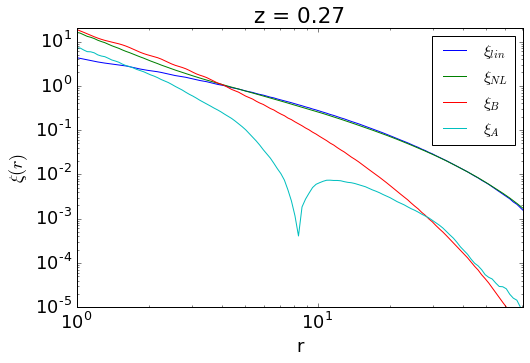

In [580]:
fig = plt.figure(figsize=(8, 5))
ax  = fig.add_subplot(1, 1, 1)
Xi_fucn['X_lin'].plot(     label='$\\xi_{lin}$')
Xi_fucn['X_NL'].plot(      label='$\\xi_{NL}$')
Xi_Afid_027['Xb'].plot(    label='$\\xi_B$')
Xi_Afid_027['abs_Xa'].plot(label='$\\xi_A$')
#Xi_Anze_027['abs_Xa'].plot(label='$\\xi_A$ - Anze Approx')
#Xi_Anze_027['Xb'].plot(label='$\\xi_B$ - Anze Approx')
ax.set_ylabel('$\\xi(r)$')
ax.set_xlim([1,71])
ax.set_ylim(ymin=1e-5)
ax.set_title('z = 0.27')
logs_legend(plt, ax)

## Computing Xi_gg and Xi_gm
for several values of b1 and b2

In [567]:
def xi_gg(b1=1.8, b2=0):
    return b1**2*Xi_fucn.X_NL + (2*b1*b2)*Xi_Afid_027.Xa + (0.5*b2**2)*Xi_Afid_027.Xb


def xi_gm(b1=1.8, b2=0):
    return b1*Xi_fucn.X_NL + b2*Xi_Afid_027.Xa


def plot_xi(xi, ax, plot_b1=False, plot_b2=False):
    if plot_b2:
        for b2 in np.arange(5):
            b2 = -1.5 + 0.5*b2
            xi(b2=b2).plot(ax = ax, label = 'b2 = {}'.format(b2))
    if plot_b1:
        for b1 in np.arange(5):
            b1 = 1.5 + 0.2*b1
            xi(b1=b1).plot(ax = ax, label = 'b1 = {}'.format(b1))
    Xi_fucn['X_NL'].plot(label='$\\xi_{NL}$', ax=ax)
    ax.legend(loc= 'best')
    logs(ax) 

<function matplotlib.pyplot.tight_layout>

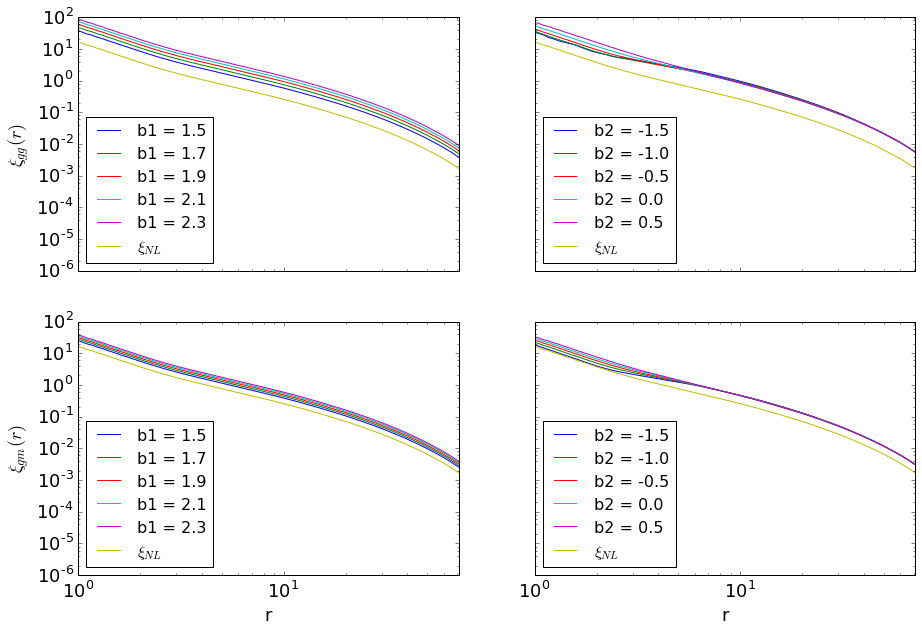

In [576]:
#fig = plt.figure(figsize=(15, 5))
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15, 10))
ax1  = plt.subplot(2, 2, 1, sharex=ax3)
ax2  = plt.subplot(2, 2, 2, sharex=ax4, sharey=ax1)
ax3  = plt.subplot(2, 2, 3)
ax4  = plt.subplot(2, 2, 4, sharey=ax3)

plot_xi(xi_gg, ax1, plot_b1= True)
plot_xi(xi_gg, ax2, plot_b2= True)
plot_xi(xi_gm, ax3, plot_b1= True)
plot_xi(xi_gm, ax4, plot_b2= True)

ax1.set_ylabel('$\\xi_{gg}(r)$')
ax3.set_ylabel('$\\xi_{gm}(r)$')
plt.tight_layout

## Upsilon gg and gm
Comparison with Sukhdeep's

In [448]:
#read files

#%cat 'data/best_mock_bigMD_RST_singlesnap_rebin1_DM1_r010.dat'
Ups_gg_Suk = pd.read_csv('data/test_gg_Sukh27.dat', names = ['r', 'wgg', 'ups'], 
                        skiprows=[0], index_col=['r'], sep='\s+')
Ups_gm_Suk = pd.read_csv('data/test_gm_Sukh27.dat', names = ['r', 'wgm', 'ups'], 
                        skiprows=[0], index_col=['r'], sep='\s+')
Ups_FFT = pd.read_csv('data/best_mock_bigMD_RST_singlesnap_rebin1_DM1_r010.dat', 
                     names =['r', 'Ups_obs', 'Ups_err', 'Ups_th'], sep ='\s+')

In [449]:
# for best_fit, split files to gg and gm
Ups_fft_gg, Ups_fft_gm = np.array_split(Ups_FFT, 2)

In [450]:
# set the new index to 'r'

Ups_fft_gg.index = Ups_fft_gg['r']
Ups_fft_gm.index = Ups_fft_gm['r']
Ups_fft_gm.head(2)

,r,Ups_obs,Ups_err,Ups_th
r,,,,
13.2398,13.2398,2.805348,0.124579,2.675298
15.2398,15.2398,3.449673,0.151162,3.355147


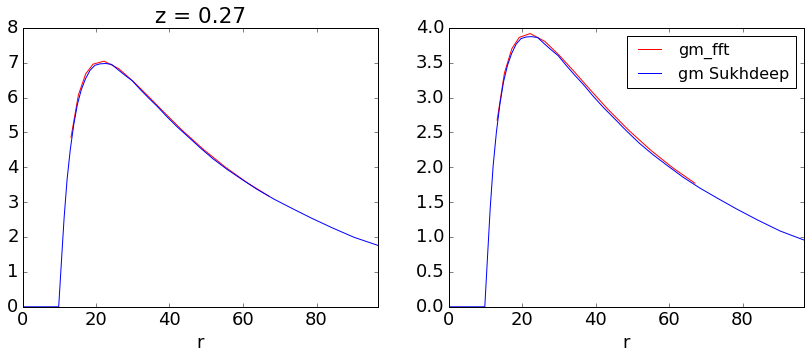

In [453]:
# plot

fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
Ups_fft_gg['Ups_th'].plot(ax= ax, color='r', linestyle='-', label = 'gg_fft')
Ups_gg_Suk['ups'].plot(ax= ax, label = 'gg Sukhdeep')

ax2 = plt.subplot(1, 2, 2)
Ups_fft_gm['Ups_th'].plot(ax= ax2, color='r', linestyle='-', label='gm_fft')
Ups_gm_Suk['ups'].plot(ax= ax2, label='gm Sukhdeep')
ax.set_title('z = 0.27')
plt.legend(loc ='best')

# Plotting for different b2 values

In [454]:

def read_files(num, fname, R0):
    Ups_FFT = pd.read_csv('data/best_mock_bigMD_RST_{}_rebin1_DM1_r0{}_0{}.dat'.format(fname, R0, num), 
                     names =['r', 'xi_obs', 'xi_err', 'xi_th'], sep ='\s+')
    Ups_fft_gg, Ups_fft_gm = np.array_split(Ups_FFT, 2)
    Ups_fft_gg.index = Ups_fft_gg['r']
    Ups_fft_gm.index = Ups_fft_gm['r']
    return Ups_fft_gg, Ups_fft_gm

In [304]:
def plot_files(b2, ax, ax2, fname, R0):
    g = read_files(b2, fname, R0)
    names = ['-0.2','0.0','0.2','0.4']
    b2_dic= dict(enumerate(names))
    g[0]['xi_th'].plot(ax= ax,  linestyle='-')
    g[1]['xi_th'].plot(ax= ax2,  linestyle='-', label = 'b2 ={}'.format(b2_dic[b2]))

In [455]:
def plot_style(ax, ax2, fname, R0):
    ax.set_xlim([5,71])
    ax2.set_xlim([5,71])
    ax.set_ylabel('gg')
    ax2.set_ylabel('gm')
    ax2.set_title('{}, R0 = {}'.format(fname, R0), fontsize='20')

In [456]:
def full_plot(fname, R0):
    fig = plt.figure(figsize=(14, 5))
    ax = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    
    g= read_files(0, fname, R0)
    g[0]['xi_obs'].plot(ax=ax, yerr=g[0]['xi_err'], fmt='o')
    g[1]['xi_obs'].plot(ax=ax2, yerr=g[1]['xi_err'], fmt='o')

    for i in np.arange(4):
        plot_files(i, ax, ax2, fname, R0=R0)

    plot_style(ax, ax2, fname, R0=R0)
    plt.legend(loc='best')

# Singlesnap
fix b1=1.8, s8=0.8

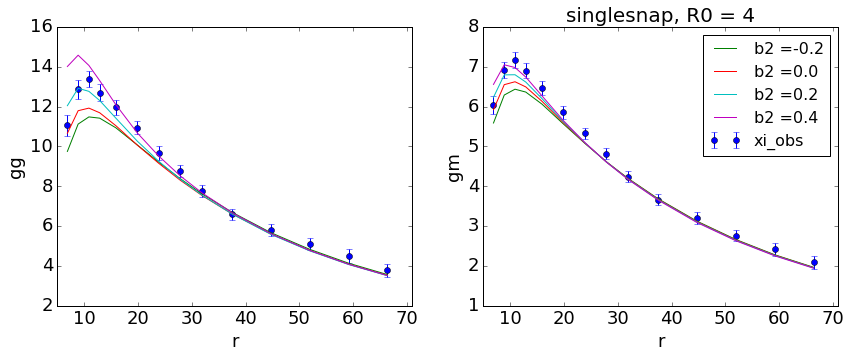

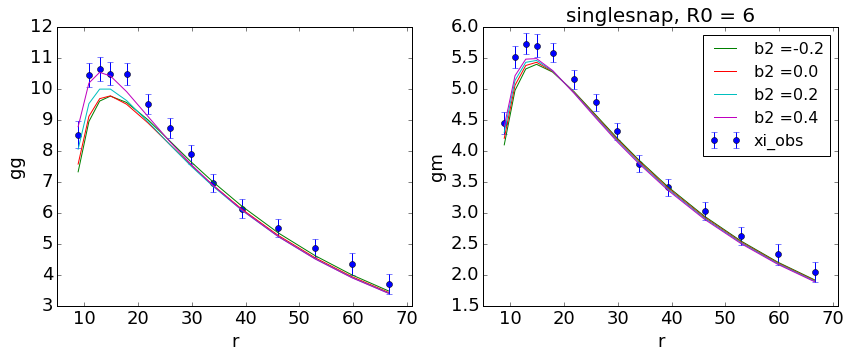

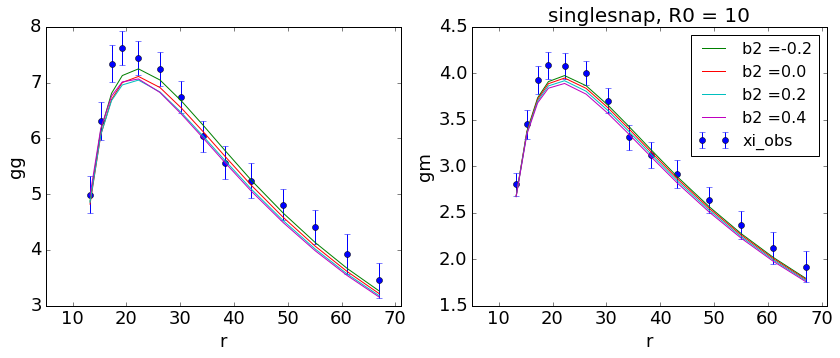

In [577]:
full_plot(fname= 'singlesnap', R0= 4)
full_plot(fname= 'singlesnap', R0= 6)
full_plot(fname= 'singlesnap', R0= 10)

# Evolve
fix b1=1.8, s8=0.8

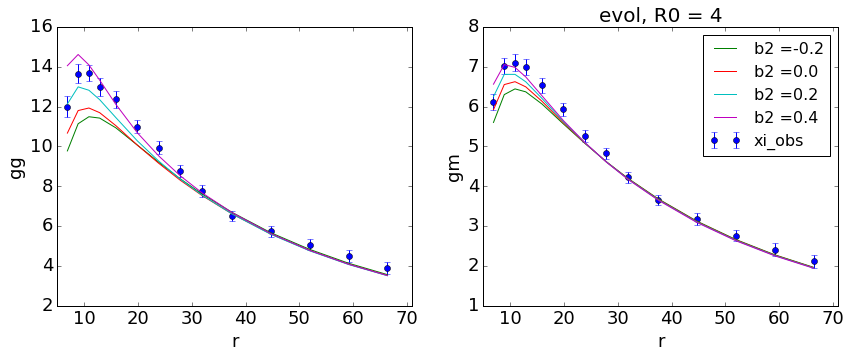

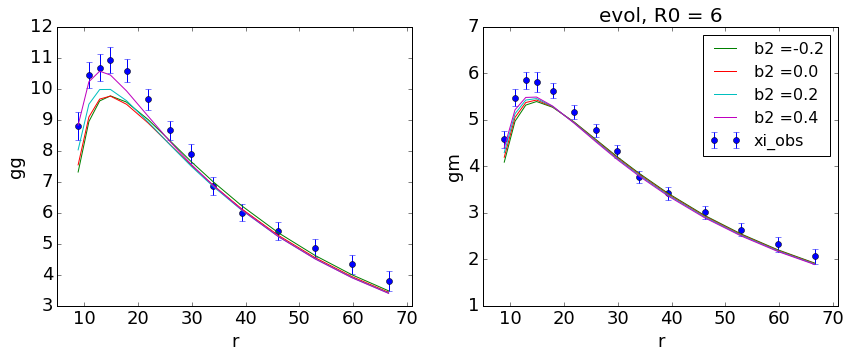

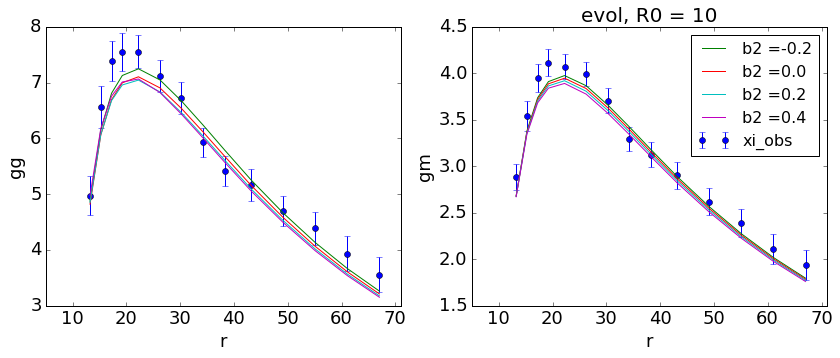

In [579]:
full_plot(fname= 'evol', R0= 4)
full_plot(fname= 'evol', R0= 6)
full_plot(fname= 'evol', R0= 10)

In [4]:
def read_csv_file(file, col1, col2):
    col_1 , col_2 = [], []
    with open(file, 'rb') as f:
        reader = csv.reader (f, delimiter='\n')
        for row in reader:
            print row
            col_1.append(row[col1])
            col_2.append(row[col2])
        return col_1, col_2    

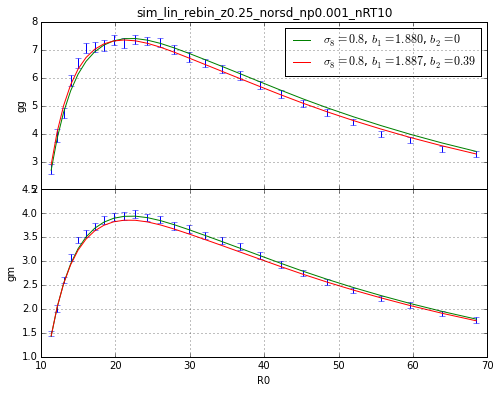

In [109]:
best_file = 'best_sim_lin_rebin_z0.25_norsd_np0.001_nRT10_r010_jk0_gg.dat'
best_file_2 = 'best_sim_lin_rebin_z0.25_norsd_np0.001_nRT10_r010_jk0_2_gg.dat'
best = np.loadtxt(best_file, unpack=True)
best_2 = np.loadtxt(best_file_2, unpack=True)

best2_file = 'best_sim_lin_rebin_z0.25_norsd_np0.001_nRT10_r010_jk0_gm.dat'
best2_file_2 = 'best_sim_lin_rebin_z0.25_norsd_np0.001_nRT10_r010_jk0_2_gm.dat'
best2 = np.loadtxt(best2_file, unpack=True)
best2_2 = np.loadtxt(best2_file_2, unpack=True)


f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,6))


ax1.errorbar(best[0], best[1], yerr=best[2], linestyle="None")
ax1.plot(best[0],best[3], label=('$\sigma_8=0.8$, $b_1 =1.880$, $b_2=0$'))
ax1.plot(best[0],best_2[3], label=('$\sigma_8=0.8$, $b_1 =1.887$, $b_2=0.39$'))
f.subplots_adjust(hspace=0)
ax1.set_title('sim_lin_rebin_z0.25_norsd_np0.001_nRT10')
ax1.set_ylabel('gg')
ax1.legend(loc="upper right")
ax1.grid(True)


ax2.errorbar(best2[0], best2[1], yerr=best2[2], linestyle="None")
ax2.plot(best2[0],best2[3])
ax2.plot(best2[0],best2_2[3])
ax2.set_ylabel('gm')
ax2.grid(True)

plt.xlabel('R0')
plt.show()



In [9]:
file_read = '/Users/josevazquezgonzalez/Desktop/Ups/Upsilon/Results/Useful/jk_sim.dat'


/Users/josevazquezgonzalez/Desktop/Ups/Upsilon/Results


In [11]:
file1 = np.loadtxt(file_read, unpack=True)


(1, 11)

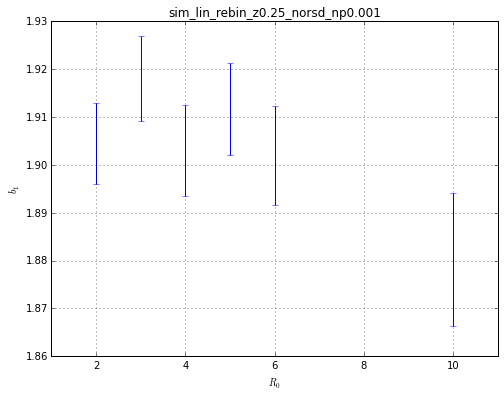

In [25]:
f, ax1 = plt.subplots(1,1, figsize=(8,6))


ax1.errorbar(file1[0], file1[3], yerr=file1[4]*10, linestyle="None")
plt.grid(True)
plt.ylabel('$b_1$')
plt.xlabel('$R_0$')
plt.title('sim_lin_rebin_z0.25_norsd_np0.001')
plt.xlim([1,11])